In [43]:
# pip install xarray numpy cartopy requests scipy

In [40]:
import requests
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeat
from pathlib import Path

Download the list of available data files from the dev server. This is also used to populate the data store at https://xds-dev.ecmwf.int/datasets/ad4gd-air-quality

In [ ]:
r = requests.get("http://ad4gd-test.ecmwf-development.f.ewcloud.host/manifest.txt")
first_url = r.text.split("\n")[0]

As an example, take the first URL to download.

In [33]:
print(f"Downloading {first_url}")
data = requests.get(first_url)
with open("tmp_data.nc", "wb") as f:
    f.write(data.content)

In [35]:
print(f"Opening dataset")
ds = xr.open_dataset("tmp_data.nc", engine="netcdf4")
ds

Opening dataset


<xarray.Dataset> Size: 113MB
Dimensions:  (lat: 871, lon: 1350, time: 24)
Coordinates:
  * lat      (lat) float64 7kB 46.51 46.52 46.52 46.53 ... 55.18 55.19 55.2
  * lon      (lon) float64 11kB 2.005 2.015 2.025 2.035 ... 15.47 15.48 15.49
  * time     (time) datetime64[ns] 192B 2024-10-26 ... 2024-10-26T23:00:00
Data variables:
    pm2p5    (time, lat, lon) float32 113MB ...
Attributes:
    title:        PM2.5 mass concentration
    Conventions:  CF-1.8
    institution:  AD4GD
    source:       IoT sensor network
    history:      Created 2025-04-09 13:06:43.217654
    summary:      A high resolution dataset for particulate matter (PM2.5 and...
    license:      The dataset is distributed under the Licence to Use Coperni...
    references:   https://doi.org/10.5281/zenodo.10839023

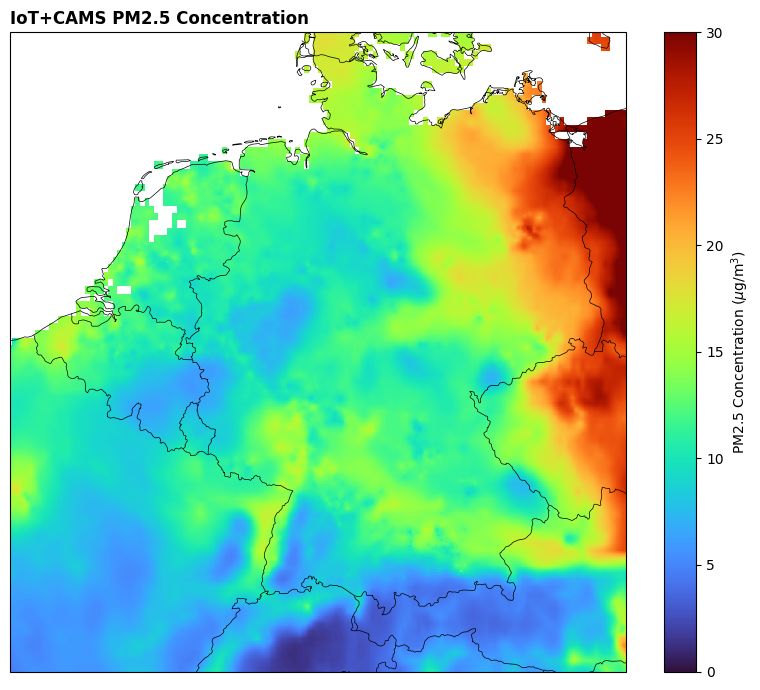

In [42]:
mods = ds.mean('time')
 
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_aspect('auto')
cm = ax.pcolormesh(mods.lon, mods.lat, mods.pm2p5, vmin=0, vmax=30,
                   cmap='turbo', transform=ccrs.PlateCarree())
plt.colorbar(cm, ax=ax, label=r'PM2.5 Concentration ($\mu$g/m$^3$)')
ax.coastlines('10m', lw=0.5)
ax.add_feature(cfeat.BORDERS, lw=0.5)
ax.set_title('IoT+CAMS PM2.5 Concentration', fontweight='bold', loc='left')
plt.tight_layout()
# picfn = Path.home() / 'Pictures' / 'pm25_cams.png'
# plt.savefig(picfn, dpi=300, bbox_inches='tight')
plt.show()